In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# set the filepath and load in a shapefile

fp = "inProgress_bbl_with_nta_shapes/bbl_with_nta.shp"
inProgressNTA_df = gpd.read_file(fp)

In [3]:
fp2 = "nta_shapes/geo_export_b178036e-3432-48fd-8da3-c2f1ca72d2d1.shp"
nta_df = gpd.read_file(fp2)

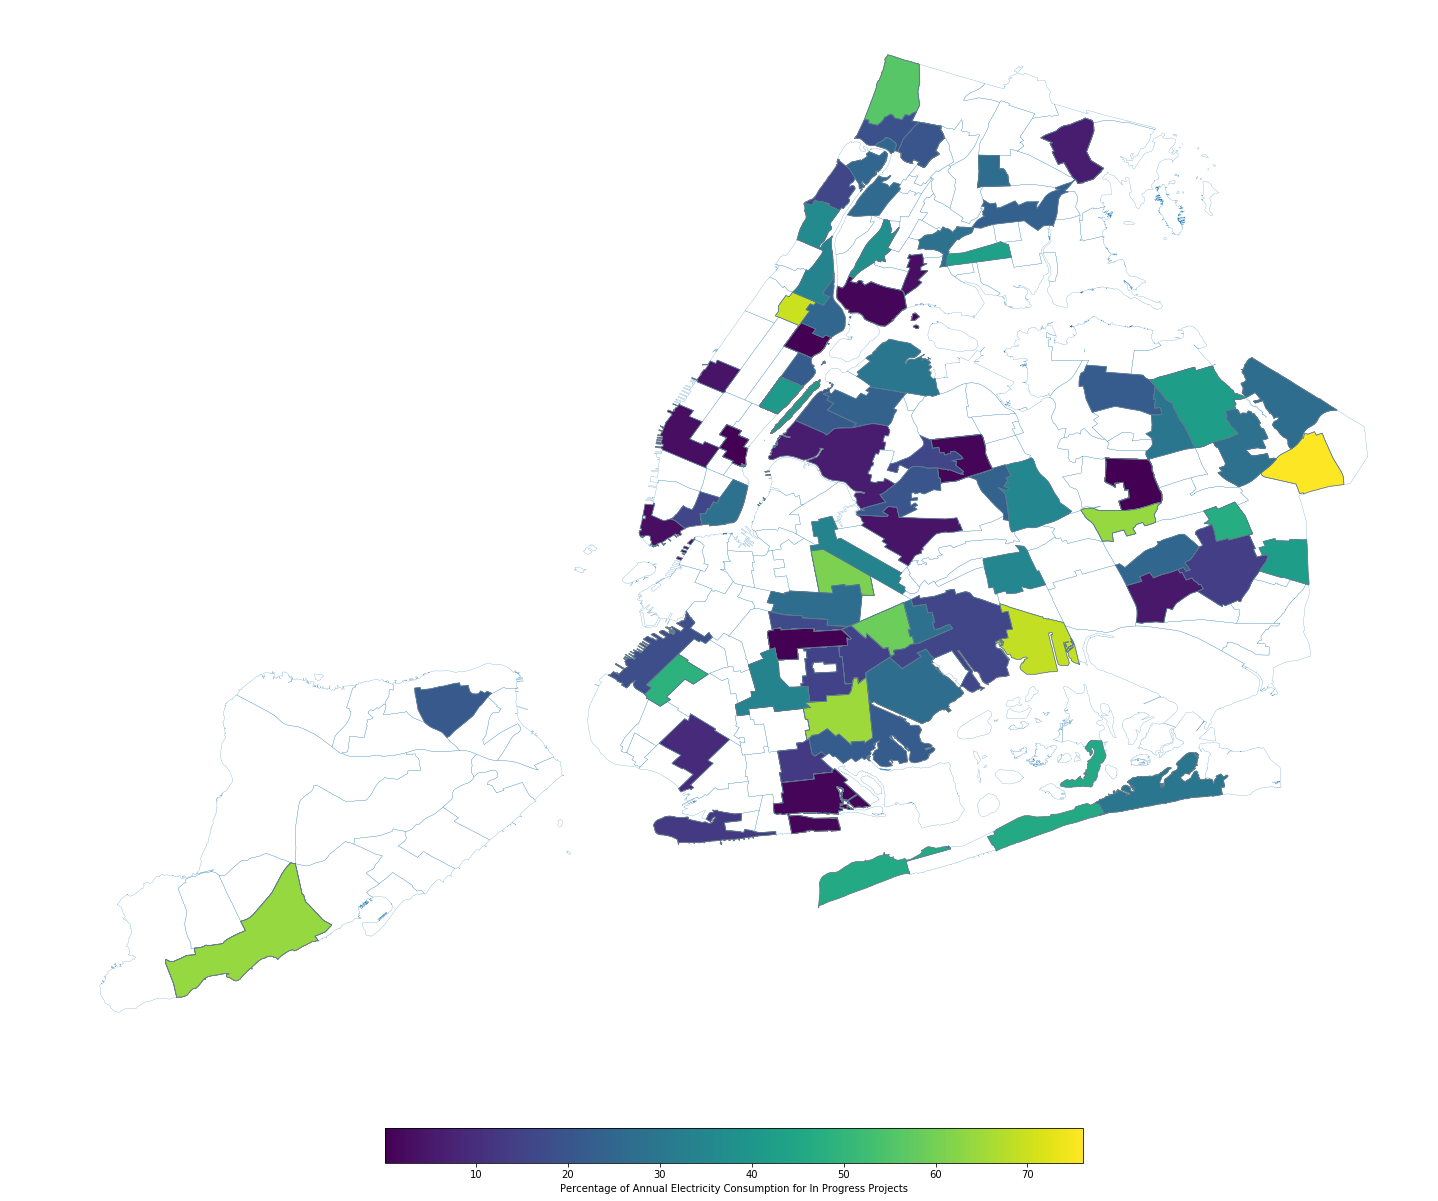

In [4]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Percenta_1'

# set the range for the choropleth
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(25, 25))

ax.axis('off')

legend_kwds={'label': "Percentage of Annual Electricity Consumption for In Progress Projects",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Percentage of Annual Electricity Consumption for In Progress Projects.png')

In [5]:
inProgressNTA_df.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,index_righ,City Counc,Agency,...,heightroof,date_lstmo,time_lstmo,lststatype,name,num_floors,shape_ar_1,shape_len,sub_code,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904797,117,19,DOE,...,42.8300,2008-06-05,00:00:00.000,Constructed,None,3.0,45737.399884,1345.167695,210000.0,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,179,27,DOE,...,43.8300,2009-02-14,00:00:00.000,Constructed,None,2.0,63165.523120,1076.219845,210000.0,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
2,4.0,Queens,081,QN07,Hollis,2.288777e+07,20976.335574,178,27,DOE,...,14.4600,2009-02-14,00:00:00.000,Constructed,None,2.0,427.793998,82.736960,210000.0,"POLYGON ((-73.75726 40.71814, -73.75589 40.716..."
3,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316951,175,27,DOE,...,13.7500,2009-02-14,00:00:00.000,Constructed,None,3.0,435.244115,83.461927,511000.0,"POLYGON ((-73.75205 40.70523, -73.75174 40.704..."
4,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316951,176,27,DOE,...,51.6158,2008-06-12,00:00:00.000,Constructed,None,3.0,19569.508054,963.617869,210000.0,"POLYGON ((-73.75205 40.70523, -73.75174 40.704..."


In [6]:
inProgressNTA_df['Estimate_2'] = inProgressNTA_df['Estimate_2'].astype(str).str.replace(' MT CO2', '').astype(int)

In [7]:
inProgress_Boro_CO2_Reduction = inProgressNTA_df.groupby('boro_name')['Estimate_2'].sum().sort_values()


Text(0, 0.5, 'Estimated Annual Emissions Reduction (MT CO2)')

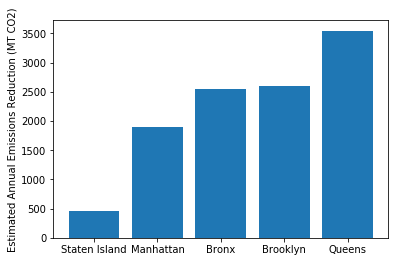

In [8]:
plt.bar(inProgress_Boro_CO2_Reduction.index, inProgress_Boro_CO2_Reduction)
plt.ylabel('Estimated Annual Emissions Reduction (MT CO2)')


In [9]:
inProgressNTA_df['Estimate_1'] = inProgressNTA_df['Estimate_1'].astype(str).str.replace(' kWh', '').str.replace(',','').astype(int)

In [10]:
inProgress_Boro_Est_Annual_Prod = inProgressNTA_df.groupby('boro_name')['Estimate_1'].sum().div(1000000).sort_values()
inProgress_Boro_Est_Annual_Prod

boro_name
Staten Island     1.763001
Manhattan         7.324066
Bronx             9.776968
Brooklyn          9.968477
Queens           13.627584
Name: Estimate_1, dtype: float64

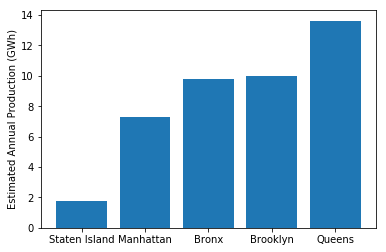

In [11]:
fig, ax = plt.subplots()
ax.bar(inProgress_Boro_Est_Annual_Prod.index, inProgress_Boro_Est_Annual_Prod)
ax.set_ylabel('Estimated Annual Production (GWh)')
plt.savefig('Per Borough Estimated Annual Production (GWh).png')

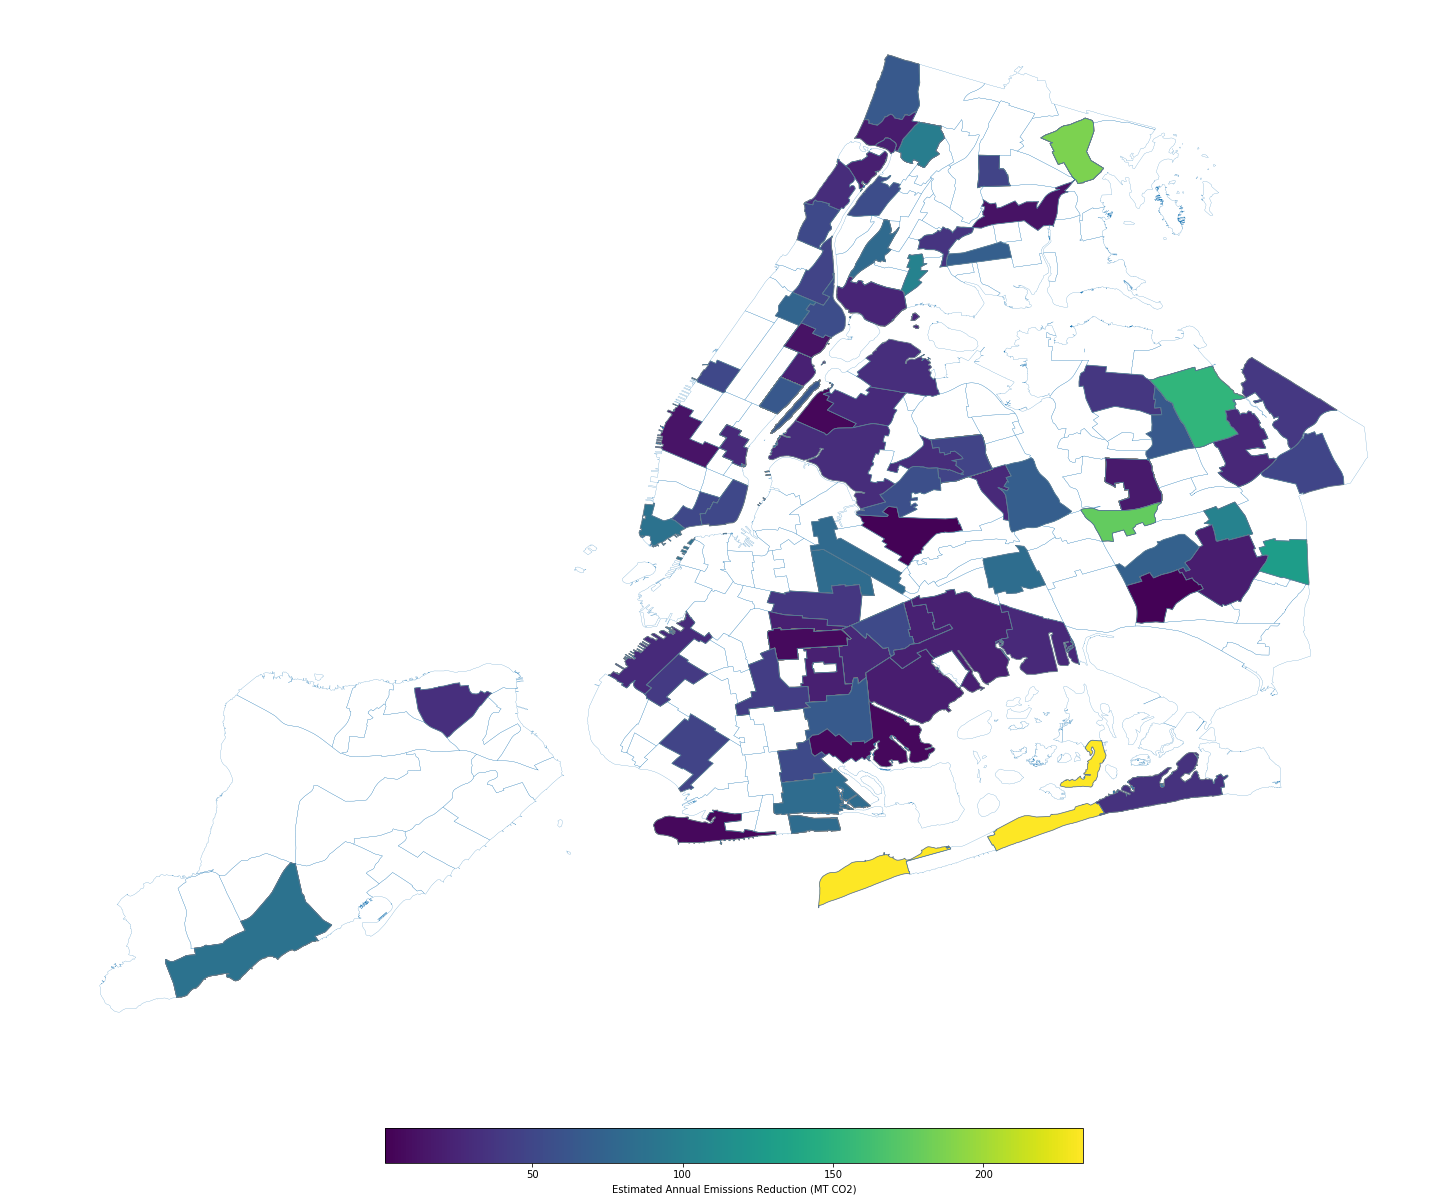

In [16]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Estimate_2'

# # set the range for the choropleth
# vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig2, ax2 = plt.subplots(1, figsize=(25, 25))

ax2.axis('off')

legend_kwds={'label': "Estimated Annual Emissions Reduction (MT CO2)",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax2, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax2, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Estimated Annual Emissions Reduction (MT CO2) for In Progress Projects.png')

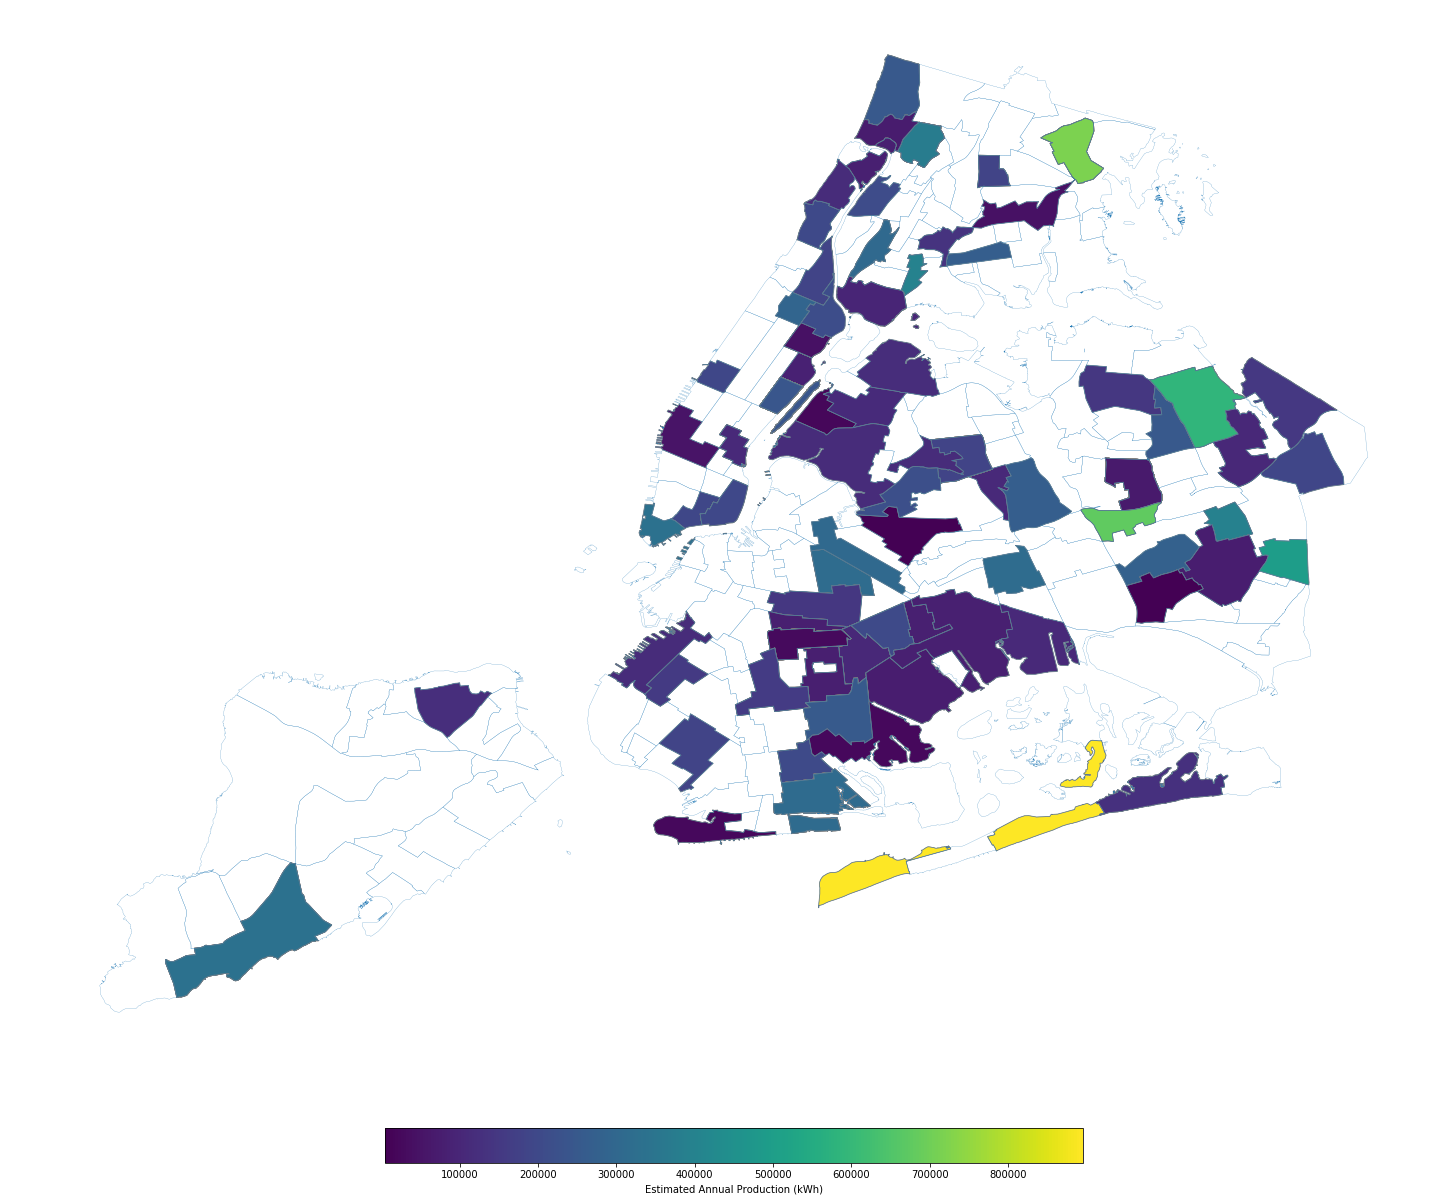

In [20]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Estimate_1'

# # set the range for the choropleth
# vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig3, ax3 = plt.subplots(1, figsize=(25, 25))

ax3.axis('off')

legend_kwds={'label': "Estimated Annual Production (kWh)",'shrink': 0.5, 'orientation':'horizontal', 'pad':0.05}
nta_df.boundary.plot( ax = ax3, linewidth=0.2 )
inProgressNTA_df.plot(variable, linewidth=0.8, ax=ax3, edgecolor='0.5', legend=True, legend_kwds=legend_kwds)
plt.savefig('Estimated Annual Production (kWh) for In Progress Projects.png')